# Gapminder
Inspired by https://www.gapminder.org/tools/

GAPMINDER POPULATION

Source: World Bank Gapminder
https://github.com/open-numbers/ddf--gapminder--systema_globalis

GAPMINDER LIFE EXPECTANCY

Source: World Bank Gapminder
https://github.com/open-numbers/ddf--gapminder--systema_globalis

GAPMINDER INCOME

Source: World Bank Gapminder
https://github.com/open-numbers/ddf--gapminder--systema_globalis

GAPMINDER COUNTRY

Source: World Bank Gapminder
https://github.com/open-numbers/ddf--gapminder--systema_globalis

[########################################] | 100% Completed | 26.0s



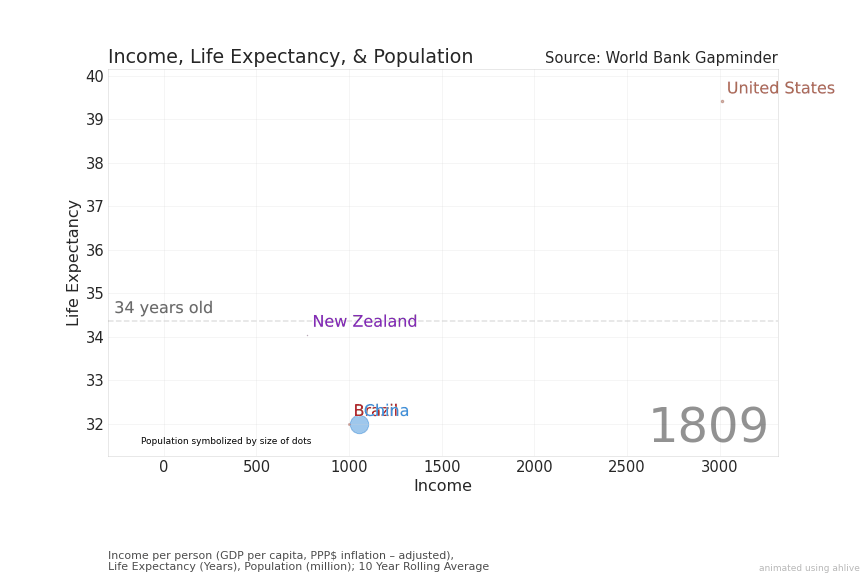

In [3]:
import pandas as pd
import ahlive as ah

# open and combine dataframes
pop_df = ah.tutorial.open_dataset('gapminder_population')
lex_df = ah.tutorial.open_dataset('gapminder_life_expectancy')
inc_df = ah.tutorial.open_dataset('gapminder_income')
cnt_df = ah.tutorial.open_dataset('gapminder_country')
df = pop_df.merge(lex_df, on=['geo', 'time']).merge(inc_df, on=['geo', 'time'])
df = df.set_index('geo').join(cnt_df.set_index('country')[['name', 'region']])

# subset and preprocess
countries = ['United States', 'China', 'New Zealand', 'Brazil']
df = df.loc[df['name'].isin(countries)]
df = df.loc[df['time'] <= 2020]
df['population'] = df['population'] / 1e6

# apply 10 year rolling mean to lessen bouncing
numeric_cols = ['population', 'life_expectancy', 'income']
df[numeric_cols] = df.groupby('name')[
    numeric_cols
].rolling(10).mean().reset_index(level=0)[numeric_cols]
df = df.dropna()

df_avg = df.groupby("time").mean()

# animate
caption = (
    'Income per person (GDP per capita, PPP$ inflation – adjusted),\n'
    'Life Expectancy (Years), Population (million); 10 Year Rolling Average')
ah_df = ah.DataFrame(
    # map data onto axes
    df,
    xs='income',
    ys='life_expectancy',
    s='population',
    alpha=0.5,

    # have a line trail behind
    preset='trail',

    # add labels
    label='name',
    inline_labels='name',
    state_labels='time',
    title='Income, Life Expectancy, & Population',
    subtitle='Source: World Bank Gapminder',
    note='Population symbolized by size of dots',
    caption=caption,

    # update figure attributes
    figsize=(12, 8),
    legend=False,

    # update limits
    xlim0s=0,
    xlim1s='explore',
    ylims="explore",
    xmargins=0.1,
    ymargins=0.1,

    # schedule
    scheduler='processes',
    workers=4,
).remark(
    # pause 2 seconds every 20 years
    remarks='s',
    state_labels=range(1820, 2020, 20),
    durations=2,
    persist_plot=True
).reference(
    # map average life expectancy to a horizontal line
    y0s=df_avg["life_expectancy"],
    alpha=0.2,
    inline_locs=0,
    inline_labels=df_avg["life_expectancy"],
).config(**{
    # finalize configuration
    'remark_inline': dict(suffix='M people'),
    'ref_inline': dict(suffix=' years old', ha="center"),
    'durations': dict(transition_frames=0.1, final_frame=5),
    'preset': dict(chart="line", expire=99999)
})
ah_df.render()